# wordcloud 환경세팅

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from wordcloud import WordCloud
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

#graph에 retina display
%config InlineBackend.figure_format = 'retina'

# 분석할 데이터 가져오기

In [233]:
import glob
paths = glob.glob("*.*")
paths

['02-1. 크롤링된 데이터를 이용해 wordcloud 진행하기[뉴스데이터].ipynb',
 '야간택시_네이버뉴스.txt',
 '02. 크롤링된 데이터를 이용해 wordcloud 진행하기.ipynb',
 "01-1. 네이버 뉴스 '교통약자' 검색해서 뉴스 제목 크롤링 하기.ipynb",
 '야간택시_네이버뉴스.csv',
 'night_taxi.png',
 'img3.png',
 '01. 교통약자 키워드 크롤링 in riss (완성).ipynb',
 "01-2. '야간택시' 네이버 뉴스 제목 크롤링 하기.ipynb",
 '02-2. 야간택시 뉴스 제목 워드클라우드.ipynb']

In [234]:
paths[4]

'야간택시_네이버뉴스.csv'

In [235]:
df = pd.read_csv(paths[4])
df

,0
0,[데이터로 보는 경기] 업종 갈아탄 기사들 밤마다 택시대란’
1,야간 '택시대란' 이유 있었네 코로나 후 법인 기사 14% 줄어
2,택시가 울고 있다 기사는 떠나고 적자는 쌓이고 소비자 불편은 커가는데
3,40년만의 택시 합승 첫날 ’범죄 위험’ vs 승차대란 해소’ 우려 기대
4,수원시 6월1일부터 법인 개인 중형택시 부제시간 오전 5시 변경
...,...
995,[당선] 구좌 우도 김경학 무투표 당선 3선으로 몸집 키웠다
996,제주공항 저녁에 택시타면 최소 5500원 어떻게 생각하세요?
997,반반택시 택시업계 '상생' 모범사례 될까?
998,무단횡단 보행자 치어 사망케 한 오토바이 택시 기사 무죄’


## noun_extractor를 이용해서 명사 추출해서 최대한 명사만 추출해 워드클라우드 생성

In [236]:
from soynlp.noun import LRNounExtractor

In [237]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(df)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (0, 0) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 0 nouns are extracted
CPU times: user 7.11 ms, sys: 3.86 ms, total: 11 ms
Wall time: 10.9 ms


In [238]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun = df['0'].apply(preprocess)

In [239]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [240]:
#클라우드로 나타내고 싶은 폰트 설정
fontpath = '/Users/jeon-eunji/Library/Fonts/AppleSDGothicNeoB.ttf'

In [246]:
#불용어 설정
stopwords_kr = ['야간택시', '야간', '택시', '포항 여대생', '심야', '택시기사', '운행', '포항', '여대생']

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.8 µs


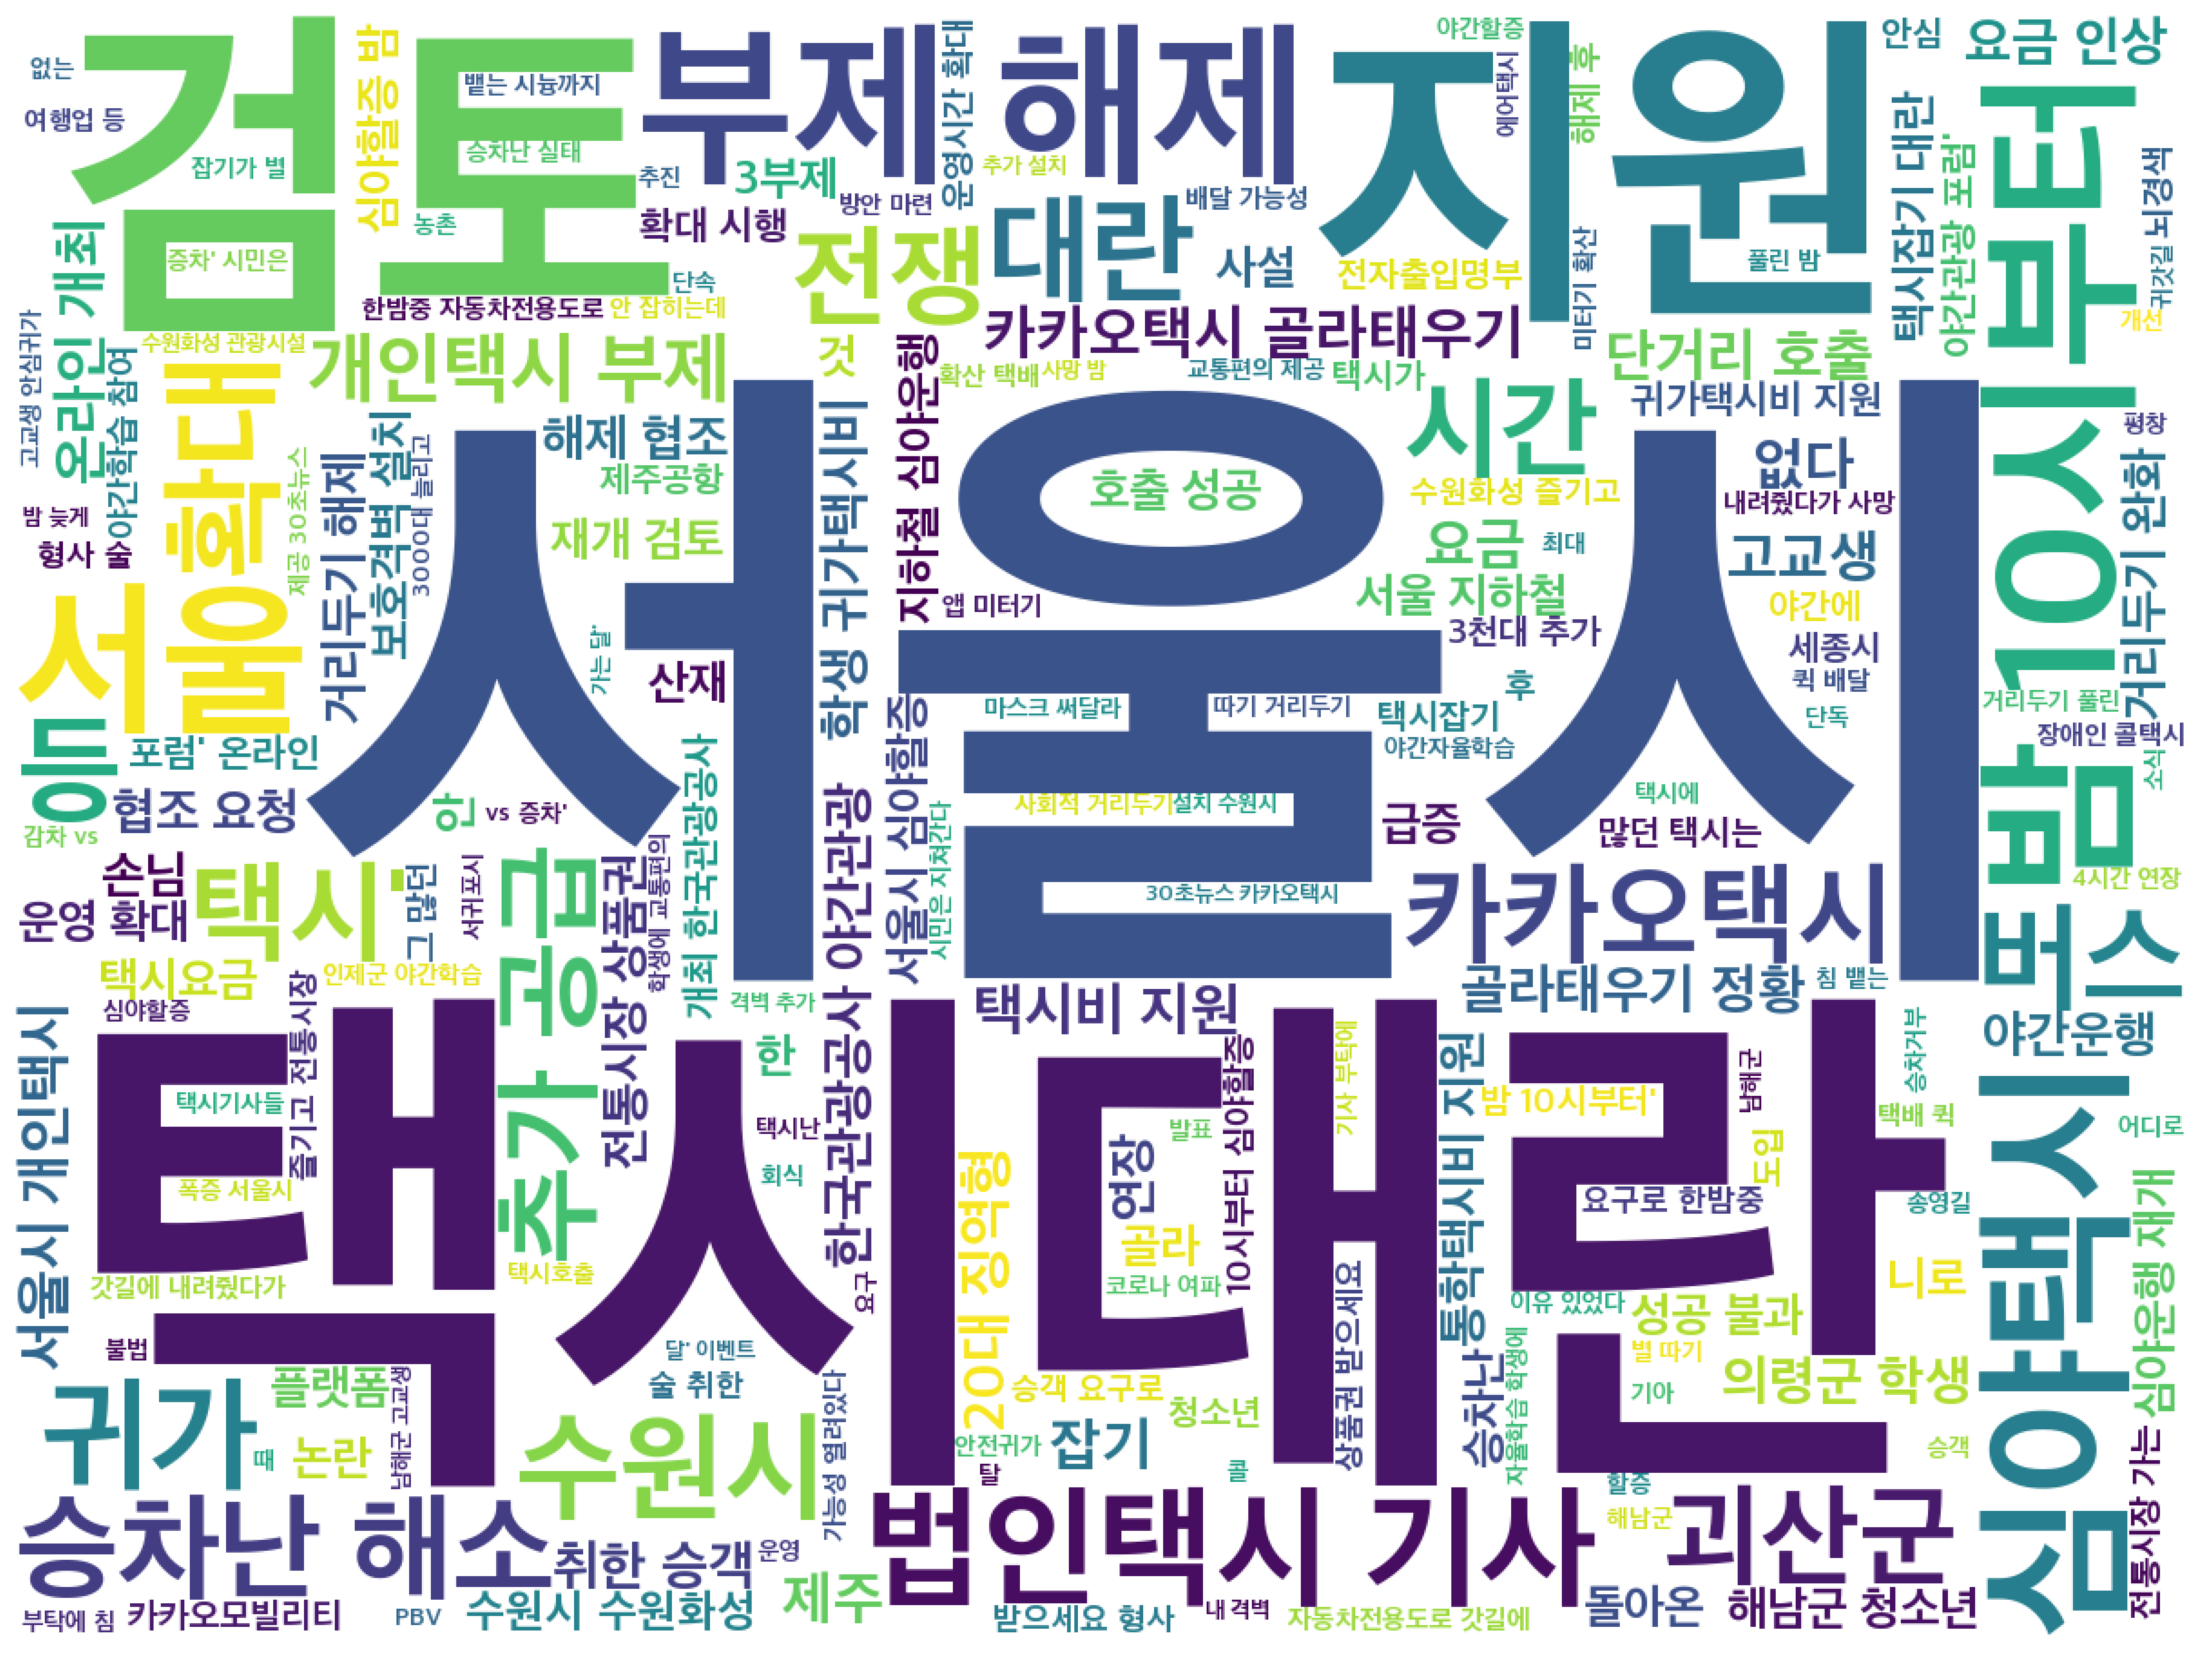

In [247]:
%time 
night_taxi_cloud = displayWordCloud(' '.join(df_noun))
night_taxi_cloud